## 인공신경망 기초

### AND, OR, XOR 연산

#### 데이터 세트 생성

In [1]:
import tensorflow as tf

x1 = [0,0,1,1]
x2 = [0,1,0,1]
x = tf.transpose(tf.constant([x1,x2],dtype=tf.float32))

and_y = tf.constant([0,0,0,1],dtype=tf.float32)
or_y = tf.constant([0,1,1,1],dtype=tf.float32)
xor_y = tf.constant([0,1,1,0],dtype=tf.float32)

print(f"x: \n{x}")
print(f"AND y:\t{and_y}",f"OR  y:\t{or_y}",f"XOR y:\t{xor_y}",sep="\n")

x: 
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
AND y:	[0. 0. 0. 1.]
OR  y:	[0. 1. 1. 1.]
XOR y:	[0. 1. 1. 0.]


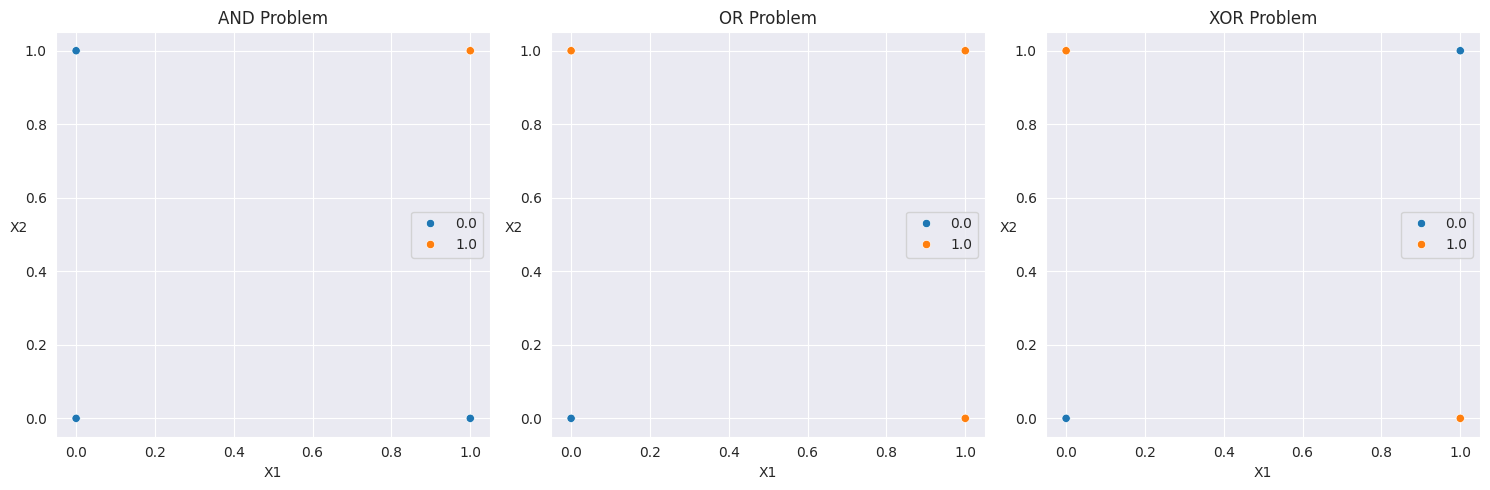

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# AND 문제
sns.scatterplot(x=x[:, 0], y=x[:, 1], hue=and_y, ax=axs[0])
axs[0].set_title("AND Problem")
axs[0].set_xlabel("X1")
axs[0].set_ylabel("X2", rotation=0)

# OR 문제
sns.scatterplot(x=x[:, 0], y=x[:, 1], hue=or_y, ax=axs[1])
axs[1].set_title("OR Problem")
axs[1].set_xlabel("X1")
axs[1].set_ylabel("X2", rotation=0)

# XOR 문제
sns.scatterplot(x=x[:, 0], y=x[:, 1], hue=xor_y, ax=axs[2])
axs[2].set_title("XOR Problem")
axs[2].set_xlabel("X1")
axs[2].set_ylabel("X2", rotation=0)
plt.tight_layout()
plt.show()

#### 퍼셉트론

In [6]:
# MLP 모델 정의
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, input_dim=2, activation='sigmoid')
])

# AND 연산
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1.0),
              loss='binary_crossentropy',
              metrics=['accuracy'],)

model.fit(x, and_y, epochs=100, batch_size=4)

# 모델 평가
loss, accuracy = model.evaluate(x, and_y)
print(f'Loss: {loss}, Accuracy: {accuracy}')

# 예측
predictions = model.predict(x)
print(f'Predictions:\n{predictions}')

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 794ms/step - accuracy: 0.7500 - loss: 0.8144
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step - accuracy: 0.7500 - loss: 0.7751
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.7500 - loss: 0.7395
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7500 - loss: 0.7070
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7500 - loss: 0.6771
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7500 - loss: 0.6496
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.7500 - loss: 0.6241
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7500 - loss: 0.6004
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.7500 - loss: 0.5785
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7500 - loss: 0.5581
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.7500 - loss: 0.5391
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.7500 - loss: 0.521

In [5]:
# OR 연산
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, input_dim=2, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1.0),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x, or_y, epochs=100, batch_size=4)

loss, accuracy = model.evaluate(x, or_y)
print(f'Loss: {loss}, Accuracy: {accuracy}')

predictions = model.predict(x)
print(f'X:\n{x}')
print(f'Predictions:\n{predictions}')

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 807ms/step - accuracy: 0.7500 - loss: 0.6426
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.5000 - loss: 0.5258
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.7500 - loss: 0.4681
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.7500 - loss: 0.4341
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.7500 - loss: 0.4108
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - accuracy: 0.7500 - loss: 0.3930
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.7500 - loss: 0.3782
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.7500 - loss: 0.3654
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 0.7500 - loss: 0.3539
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7500 - loss: 0.3432
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.7500 - loss: 0.3333
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.7500 - loss: 0.32

In [7]:
# XOR 연산
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, input_dim=2, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1.0),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x, xor_y, epochs=100, batch_size=4)

loss, accuracy = model.evaluate(x, xor_y)
print(f'Loss: {loss}, Accuracy: {accuracy}')

predictions = model.predict(x)
print(f'X:\n{x}')
print(f'Predictions:\n{predictions}')

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 727ms/step - accuracy: 0.5000 - loss: 0.8403
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.2500 - loss: 0.7697
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.2500 - loss: 0.7347
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.2500 - loss: 0.7188
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.2500 - loss: 0.7117
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.2500 - loss: 0.7083
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7500 - loss: 0.7064
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7500 - loss: 0.7051
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7500 - loss: 0.7041
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7500 - loss: 0.7032
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7500 - loss: 0.7024
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7500 - loss: 0.7017


##### 다층 퍼셉트론

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, input_dim=2, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1.0),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x, xor_y, epochs=100, batch_size=4)

loss, accuracy = model.evaluate(x, xor_y)
print(f'Loss: {loss}, Accuracy: {accuracy}')

predictions = model.predict(x)
print(f'X:\n{x}')
print(f'Predictions:\n{predictions}')

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 983ms/step - accuracy: 0.5000 - loss: 0.7342
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7500 - loss: 0.6268
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.7500 - loss: 0.5974
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.7500 - loss: 0.5767
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.7500 - loss: 0.5556
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.7500 - loss: 0.5395
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.7500 - loss: 0.5125
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 1.0000 - loss: 0.4882
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.7500 - loss: 0.4775
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 1.0000 - loss: 0.4538
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 1.0000 - loss: 0.4246
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 1.0000 - loss: 0.4107


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
X:
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]
Predictions:
[[0.06741574]
 [0.9894326 ]
 [0.9887088 ]
 [0.00612984]]


### 인공지능 모델의 설계 및 학습

In [9]:
# 임의의 독립 변수 X 값 생성
import tensorflow as tf

x = tf.random.uniform(shape=[100], minval=1, maxval=4)
print(x)

tf.Tensor(
[3.9203281 2.5755916 1.3930463 1.2716684 2.5310657 3.3058138 1.7345412
 2.9411378 1.37713   3.9727426 2.2803822 1.6330317 3.0525742 3.6511908
 2.8811417 3.8357882 3.5346913 2.2278743 2.0774262 1.2737902 3.6216118
 1.6911316 3.2773523 1.3683574 1.37971   1.0643508 1.7120124 3.7508416
 1.9720343 2.3855052 3.2816737 1.1436638 1.9946092 1.1760538 1.4634206
 2.5254278 1.8452914 3.8778324 3.5168712 3.140329  3.4678473 3.1932478
 2.3394642 3.3793716 2.3732874 1.6820725 1.2552984 3.88248   2.646237
 1.7365825 2.125432  3.7096477 2.7425694 1.3114839 1.398092  1.6066785
 2.8913665 2.2250862 3.1827035 3.7059479 3.8956542 3.4028492 3.1405935
 3.5862522 2.925608  3.682603  2.5766573 2.3174632 1.7891563 3.5077853
 2.9879904 3.9323905 2.955009  3.955957  1.6532212 2.584134  3.259312
 2.7226882 3.5084314 2.0161042 1.0741388 2.8202543 1.2626172 3.1140234
 1.4692085 3.2875233 1.5954872 3.1657715 2.9381146 3.9919212 3.7494009
 2.0908484 2.163622  3.944044  1.7129208 1.3564506 1.3031633 2.55934

In [10]:
# 선형 관계가 있는 종속 변수 Y 값 생성
slope = 1.5
intercept = 3
epsilon = tf.random.truncated_normal(shape=[100], mean=0, stddev=0.3)
y = slope * x + intercept + epsilon
print(y)

tf.Tensor(
[8.846602  6.360349  4.784011  4.7056212 7.3631535 7.361409  5.7604136
 7.4490376 4.9178166 9.126959  6.8017516 5.374454  7.024154  8.297416
 7.179602  9.347207  8.249513  6.5828795 5.8461623 4.530164  8.577099
 5.311008  8.063017  4.938866  4.630486  4.6994686 5.739179  9.166624
 5.7104526 6.9947343 7.666275  5.071167  5.6497774 4.4248996 5.004974
 7.1155286 5.829275  9.045503  8.836629  7.49988   8.376041  7.5760913
 6.3629293 8.246447  6.344405  5.7892194 4.6038775 8.423238  6.747286
 5.3769646 6.1805425 8.312097  7.0013685 5.474754  4.596107  5.332883
 7.160241  6.5101643 7.789105  8.731758  8.729753  7.8278017 7.553226
 8.670237  7.129221  8.918205  7.0999794 6.2227077 5.891929  8.779964
 7.452131  9.228916  7.445379  9.028803  5.632942  6.4076843 7.933049
 7.050471  8.177179  5.4777107 4.891165  7.171625  5.1688666 7.67462
 5.290563  8.28575   5.2387424 7.4455595 7.667528  8.97039   8.958275
 6.083103  5.9538217 8.766306  5.795906  4.9258156 4.7366543 6.859605
 6.92610

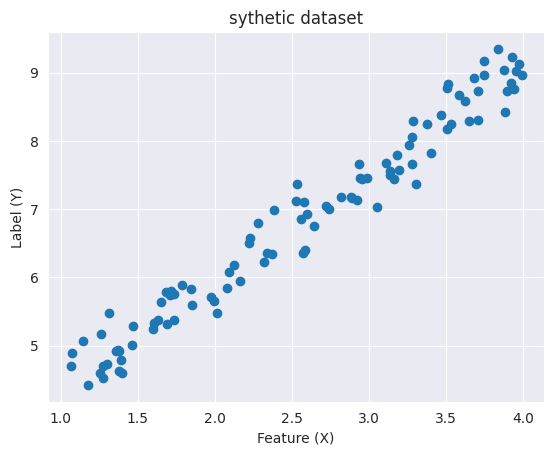

In [11]:
# 맷플로립을 사용한 데이터 시각화
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
plt.scatter(x, y)
plt.xlabel('Feature (X)')
plt.ylabel('Label (Y)')
plt.title('sythetic dataset')
plt.show()

#### 텐서플로로 선형 데이터 모델링
##### 모델 설계

In [12]:
from tensorflow.keras import Sequential

In [13]:
from tensorflow.keras.layers import Dense

In [14]:
model = Sequential()

In [15]:
model.add(Dense(1, input_shape=(1,)))

In [16]:
model.compile(loss='mean_squared_error', optimizer='sgd')

##### 모델 학습

In [17]:
x_train = tf.reshape(x, (-1, 1))
x_train.shape

TensorShape([100, 1])

In [18]:
history = model.fit(x_train, y, epochs=300)

Epoch 1/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 102.9915
Epoch 2/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 21.2864 
Epoch 3/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.5134 
Epoch 4/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.3960 
Epoch 5/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5943 
Epoch 6/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3969 
Epoch 7/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3421 
Epoch 8/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3222 
Epoch 9/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3106 
Epoch 10/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3146 
Epoch 11/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3281 
Epoch 12/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2929 
Epoch 13/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2960 
Epoch 14/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3060 
Epoch 15/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3142 
Epoch 16/300
4/4

In [19]:
weights, bias = model.get_weights()
print("Weights (Slope):", weights)
print("Bias (Intercept):", bias)

Weights (Slope): [[1.6097826]]
Bias (Intercept): [2.689723]


## 생성적 적대 신경망 아이디어
### 텐서플로를 활용한 생성적 적대 신경망의 학습 실습

In [20]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
from tqdm import tqdm
from google.colab.patches import cv2_imshow

(train_images, _), (_, _) = mnist.load_data()
train_images = (train_images - 127.5) / 127.5

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [21]:
cv2_imshow(train_images[0]*127.5+127.5)

#### 모델 생성

In [22]:
def build_generator(input_dim):
    model = Sequential()
    model.add(Dense(512, input_dim=input_dim, activation='relu'))
    model.add(Dense(28*28, activation='tanh'))
    model.add(Reshape((28, 28)))
    return model

In [23]:
def build_discriminator():
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

In [24]:
INPUT_DIM = 50
BATCH_SIZE = 64
EPOCHS = 10
BUFFER_SIZE = 600

In [25]:
generator = build_generator(INPUT_DIM)
discriminator = build_discriminator()

generator_optimizer = tf.keras.optimizers.Adam(1e-3)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [26]:
train_dataset = tf.data.Dataset.from_tensor_slices(train_images)\
                  .shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

#### 손실 함수

In [27]:
binary_cross_entropy = tf.keras.losses.BinaryCrossentropy()

def discriminator_loss(real_output, fake_output): # ①
    real_loss = binary_cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = binary_cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(fake_output):
    return binary_cross_entropy(tf.ones_like(fake_output), fake_output)

In [28]:
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, INPUT_DIM])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True)

      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))
    return gen_loss, disc_loss, generated_images

#### 모델 학습

In [29]:
for epoch in range(1,EPOCHS+1):
    t = tqdm(train_dataset)
    for image_batch in t:
        g_loss, d_loss, fake_image = train_step(image_batch)
        t.set_description_str(f"Epoch - {epoch}")
        t.set_postfix({"G_loss":"%0.3f" %g_loss.numpy(),
                       "D_loss":"%0.3f" %d_loss.numpy()})
    cv2_imshow(np.concatenate(
        list(fake_image.numpy()[:10]*127.5+127.5),axis=1))

Epoch - 1: 100%|██████████| 938/938 [00:10<00:00, 89.76it/s, G_loss=9.060, D_loss=0.001]


Epoch - 2: 100%|██████████| 938/938 [00:10<00:00, 91.74it/s, G_loss=19.087, D_loss=0.873] 


Epoch - 3: 100%|██████████| 938/938 [00:10<00:00, 91.75it/s, G_loss=10.570, D_loss=0.660] 


Epoch - 4: 100%|██████████| 938/938 [00:06<00:00, 144.65it/s, G_loss=1.675, D_loss=1.058]


Epoch - 5: 100%|██████████| 938/938 [00:10<00:00, 91.76it/s, G_loss=7.576, D_loss=1.568] 


Epoch - 6: 100%|██████████| 938/938 [00:06<00:00, 142.58it/s, G_loss=3.213, D_loss=1.364]


Epoch - 7: 100%|██████████| 938/938 [00:10<00:00, 91.69it/s, G_loss=16.262, D_loss=0.307] 


Epoch - 8: 100%|██████████| 938/938 [00:06<00:00, 142.76it/s, G_loss=3.628, D_loss=0.628]


Epoch - 9: 100%|██████████| 938/938 [00:10<00:00, 91.69it/s, G_loss=3.445, D_loss=1.470] 


Epoch - 10: 100%|██████████| 938/938 [00:10<00:00, 91.75it/s, G_loss=1.630, D_loss=0.991] 


#### 전체 코드





Epoch - 1: 100%|██████████| 938/938 [00:07<00:00, 117.86it/s, G_loss=29.957, D_loss=0.095]


Epoch - 2: 100%|██████████| 938/938 [00:06<00:00, 149.14it/s, G_loss=9.568, D_loss=0.090]


Epoch - 3: 100%|██████████| 938/938 [00:06<00:00, 138.20it/s, G_loss=5.056, D_loss=0.681]


Epoch - 4: 100%|██████████| 938/938 [00:06<00:00, 137.98it/s, G_loss=8.634, D_loss=0.271]


Epoch - 5: 100%|██████████| 938/938 [00:06<00:00, 149.36it/s, G_loss=4.872, D_loss=0.896]


Epoch - 6: 100%|██████████| 938/938 [00:10<00:00, 91.75it/s, G_loss=2.931, D_loss=0.925] 


Epoch - 7: 100%|██████████| 938/938 [00:06<00:00, 148.75it/s, G_loss=6.029, D_loss=0.391]


Epoch - 8: 100%|██████████| 938/938 [00:10<00:00, 91.73it/s, G_loss=2.669, D_loss=0.697] 


Epoch - 9: 100%|██████████| 938/938 [00:06<00:00, 149.36it/s, G_loss=2.521, D_loss=0.454]


Epoch - 10: 100%|██████████| 938/938 [00:06<00:00, 138.38it/s, G_loss=23.933, D_loss=0.839]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 472ms/step


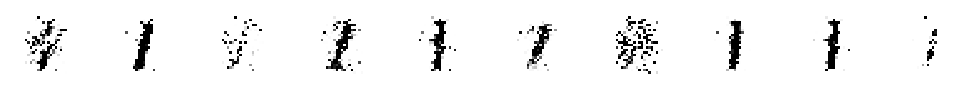

In [30]:
# 앞의 코드를 합친 전체 코드
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
from tqdm import tqdm
from google.colab.patches import cv2_imshow

(train_images, _), (_, _) = mnist.load_data()
train_images = (train_images - 127.5) / 127.5  # 이미지 정규화


train_images[0]


# 생성자 모델 생성
def build_generator(input_dim):
    model = Sequential()
    model.add(Dense(512, input_dim=input_dim, activation='relu'))
    model.add(Dense(28*28, activation='tanh'))
    model.add(Reshape((28, 28)))
    return model

# 판별자 모델 생성
def build_discriminator():
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

# 하이퍼파라미터 설정
INPUT_DIM = 50
BATCH_SIZE = 64
EPOCHS = 10
BUFFER_SIZE = 600

# 모델 생성
generator = build_generator(INPUT_DIM)
discriminator = build_discriminator()

generator_optimizer = tf.keras.optimizers.Adam(1e-3)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-2)


# 데이터 로더 생성
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

# 손실함수 정의
binary_cross_entropy = tf.keras.losses.BinaryCrossentropy()

def discriminator_loss(real_output, fake_output):
    real_loss = binary_cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = binary_cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(fake_output):
    return binary_cross_entropy(tf.ones_like(fake_output), fake_output)


@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, INPUT_DIM])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True)

      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))
    return gen_loss, disc_loss, generated_images


# 훈련
for epoch in range(1,EPOCHS+1):
    t = tqdm(train_dataset)
    for image_batch in t:
        g_loss, d_loss, fake_image = train_step(image_batch)
        t.set_description_str(f"Epoch - {epoch}")
        t.set_postfix({"G_loss":"%0.3f" %g_loss.numpy(), "D_loss":"%0.3f" %d_loss.numpy()})
    cv2_imshow(np.concatenate(list(fake_image.numpy()[:10]*127.5+127.5),axis=1))


# 생성된 이미지 시각화
import matplotlib.pyplot as plt

examples = 10
dim=(1, examples)
figsize=(10, 1)
noise = np.random.normal(0, 1, (examples, INPUT_DIM))
generated_images = generator.predict(noise)
plt.figure(figsize=figsize)
for i in range(generated_images.shape[0]):
    plt.subplot(dim[0], dim[1], i+1)
    plt.imshow(generated_images[i], interpolation='nearest', cmap='gray_r')
    plt.axis('off')
plt.tight_layout()
plt.show()


In [31]:
# 이미지 생성 예시
cv2_imshow(np.concatenate(list(image_batch.numpy()[:10]*127+127),axis=1))

## 딥러닝을 활용한 이미지 처리
### 이미지 분류
#### 이미지 분류를 위한 데이터 전처리


In [32]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [33]:
# CIFAR-10 데이터 세트를 불러옵니다.

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [34]:
# 데이터를 확인합니다.

print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
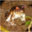

In [35]:
# 정규화된 이미지 데이터를 하나 확인합니다.

train_images[0]

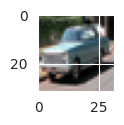

In [36]:
# 확인을 위해 출력
plt.figure(figsize=(1, 1))
plt.imshow(train_images[32])

In [37]:
# 정규화를 위해 255로 나누어 줍니다.

train_images = train_images / 255.0
test_images = test_images / 255.0

In [38]:
train_images[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [39]:
# 훈련 데이터셋과 검증 데이터셋으로 나누어 줍니다.

val_images = train_images[45000:]
val_labels = train_labels[45000:]

train_images = train_images[:45000]
train_labels = train_labels[:45000]

In [40]:
# 모델을 생성합니다.

mlp_model = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [41]:
# 모델의 구조를 확인합니다.

mlp_model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,738,890 (6.63 MB)

 Trainable params: 1,738,890 (6.63 MB)

 Non-trainable params: 0 (0.00 B)

In [42]:
# 모델을 컴파일합니다.

mlp_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [43]:
# 모델을 훈련합니다.

mlp_model.fit(train_images, train_labels, epochs=5, validation_data=(val_images, val_labels))

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.2663 - loss: 2.0189 - val_accuracy: 0.3678 - val_loss: 1.7710
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.3915 - loss: 1.6966 - val_accuracy: 0.3830 - val_loss: 1.7448
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4247 - loss: 1.6055 - val_accuracy: 0.4150 - val_loss: 1.6184
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4387 - loss: 1.5585 - val_accuracy: 0.4440 - val_loss: 1.5513
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4551 - loss: 1.5128 - val_accuracy: 0.4276 - val_loss: 1.5943


In [44]:
# 모델을 평가합니다.

mlp_model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4355 - loss: 1.5665


[1.5767855644226074, 0.430400013923645]

#### 합성곱 신경망을 활용한 이미지 분류

In [45]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout

In [46]:
# 모델을 만듭니다.

cnn_model = Sequential([
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    Flatten(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
    ])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [47]:
# 모델의 구조를 확인합니다.

cnn_model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 64)                  │         262,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 319,178 (1.22 MB)

 Trainable params: 319,178 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

In [48]:
# 모델을 컴파일합니다.

cnn_model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [49]:
# EarlyStopping, ModelCheckpoint 콜백을 정의합니다.

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_loss', patience=5)
save_best_only = ModelCheckpoint('best_cifar10_cnn_model.h5', save_best_only=True)

In [50]:
# 모델을 학습시킵니다.
# 중간에 학습이 중단되는 게 맞습니다.

history = cnn_model.fit(train_images, train_labels, batch_size=512, epochs=100, validation_data=(val_images, val_labels), callbacks=[early_stopping, save_best_only])

Epoch 1/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.2183 - loss: 2.1030

88/88 ━━━━━━━━━━━━━━━━━━━━ 13s 81ms/step - accuracy: 0.2192 - loss: 2.1012 - val_accuracy: 0.4412 - val_loss: 1.5703
Epoch 2/100
85/88 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4058 - loss: 1.6435

88/88 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.4064 - loss: 1.6417 - val_accuracy: 0.5102 - val_loss: 1.3852
Epoch 3/100
86/88 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.4618 - loss: 1.4803

88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.4624 - loss: 1.4794 - val_accuracy: 0.5532 - val_loss: 1.2661
Epoch 4/100
85/88 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5048 - loss: 1.3824

88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.5052 - loss: 1.3815 - val_accuracy: 0.5896 - val_loss: 1.1833
Epoch 5/100
85/88 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5379 - loss: 1.3044

88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.5381 - loss: 1.3036 - val_accuracy: 0.6080 - val_loss: 1.1200
Epoch 6/100
87/88 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5641 - loss: 1.2353

88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5642 - loss: 1.2350 - val_accuracy: 0.6310 - val_loss: 1.0656
Epoch 7/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5834 - loss: 1.1825

88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.5834 - loss: 1.1825 - val_accuracy: 0.6450 - val_loss: 1.0073
Epoch 8/100
85/88 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6017 - loss: 1.1304

88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.6018 - loss: 1.1302 - val_accuracy: 0.6636 - val_loss: 0.9627
Epoch 9/100
86/88 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6108 - loss: 1.1005

88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.6108 - loss: 1.1006 - val_accuracy: 0.6594 - val_loss: 0.9542
Epoch 10/100
85/88 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6322 - loss: 1.0590

88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.6321 - loss: 1.0589 - val_accuracy: 0.6734 - val_loss: 0.9109
Epoch 11/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6381 - loss: 1.0357

88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.6381 - loss: 1.0357 - val_accuracy: 0.6894 - val_loss: 0.8879
Epoch 12/100
85/88 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6443 - loss: 1.0186

88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.6444 - loss: 1.0184 - val_accuracy: 0.7036 - val_loss: 0.8663
Epoch 13/100
85/88 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6598 - loss: 0.9749

88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.6596 - loss: 0.9752 - val_accuracy: 0.7108 - val_loss: 0.8434
Epoch 14/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6652 - loss: 0.9608

88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.6652 - loss: 0.9608 - val_accuracy: 0.7110 - val_loss: 0.8350
Epoch 15/100
85/88 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6730 - loss: 0.9405

88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6729 - loss: 0.9404 - val_accuracy: 0.7164 - val_loss: 0.8181
Epoch 16/100
85/88 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6791 - loss: 0.9183

88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6792 - loss: 0.9182 - val_accuracy: 0.7286 - val_loss: 0.7934
Epoch 17/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6836 - loss: 0.9036

88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.6837 - loss: 0.9035 - val_accuracy: 0.7324 - val_loss: 0.7793
Epoch 18/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6933 - loss: 0.8772

88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.6933 - loss: 0.8772 - val_accuracy: 0.7298 - val_loss: 0.7751
Epoch 19/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.6951 - loss: 0.8786 - val_accuracy: 0.7328 - val_loss: 0.7756
Epoch 20/100
85/88 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7021 - loss: 0.8456

88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.7021 - loss: 0.8458 - val_accuracy: 0.7374 - val_loss: 0.7701
Epoch 21/100
85/88 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7096 - loss: 0.8424

88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.7095 - loss: 0.8423 - val_accuracy: 0.7324 - val_loss: 0.7651
Epoch 22/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7191 - loss: 0.8102

88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.7190 - loss: 0.8102 - val_accuracy: 0.7374 - val_loss: 0.7629
Epoch 23/100
85/88 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7132 - loss: 0.8222

88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.7134 - loss: 0.8216 - val_accuracy: 0.7396 - val_loss: 0.7487
Epoch 24/100
85/88 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7232 - loss: 0.7934

88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7231 - loss: 0.7935 - val_accuracy: 0.7488 - val_loss: 0.7271
Epoch 25/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7211 - loss: 0.7950 - val_accuracy: 0.7478 - val_loss: 0.7295
Epoch 26/100
85/88 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7298 - loss: 0.7695

88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.7299 - loss: 0.7694 - val_accuracy: 0.7568 - val_loss: 0.7083
Epoch 27/100
86/88 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7307 - loss: 0.7555

88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.7307 - loss: 0.7556 - val_accuracy: 0.7534 - val_loss: 0.7055
Epoch 28/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7389 - loss: 0.7390 - val_accuracy: 0.7562 - val_loss: 0.7119
Epoch 29/100
85/88 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7470 - loss: 0.7264

88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7469 - loss: 0.7266 - val_accuracy: 0.7652 - val_loss: 0.6931
Epoch 30/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7451 - loss: 0.7124 - val_accuracy: 0.7646 - val_loss: 0.6996
Epoch 31/100
85/88 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7512 - loss: 0.7112

88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.7511 - loss: 0.7114 - val_accuracy: 0.7612 - val_loss: 0.6920
Epoch 32/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7522 - loss: 0.7053 - val_accuracy: 0.7572 - val_loss: 0.7072
Epoch 33/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.7520 - loss: 0.7025 - val_accuracy: 0.7616 - val_loss: 0.6972
Epoch 34/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.7555 - loss: 0.6795 - val_accuracy: 0.7574 - val_loss: 0.7136
Epoch 35/100
85/88 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7597 - loss: 0.6754

88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.7596 - loss: 0.6758 - val_accuracy: 0.7692 - val_loss: 0.6824
Epoch 36/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.7629 - loss: 0.6630 - val_accuracy: 0.7608 - val_loss: 0.6958
Epoch 37/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.7639 - loss: 0.6625 - val_accuracy: 0.7720 - val_loss: 0.6851
Epoch 38/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7710 - loss: 0.6494

88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.7710 - loss: 0.6494 - val_accuracy: 0.7654 - val_loss: 0.6808
Epoch 39/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7684 - loss: 0.6478

88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.7684 - loss: 0.6478 - val_accuracy: 0.7780 - val_loss: 0.6666
Epoch 40/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7780 - loss: 0.6235 - val_accuracy: 0.7718 - val_loss: 0.6699
Epoch 41/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7808 - loss: 0.6155 - val_accuracy: 0.7748 - val_loss: 0.6704
Epoch 42/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.7800 - loss: 0.6162 - val_accuracy: 0.7736 - val_loss: 0.6706
Epoch 43/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.7845 - loss: 0.6058 - val_accuracy: 0.7714 - val_loss: 0.6840
Epoch 44/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.7856 - loss: 0.6039 - val_accuracy: 0.7710 - val_loss: 0.6767


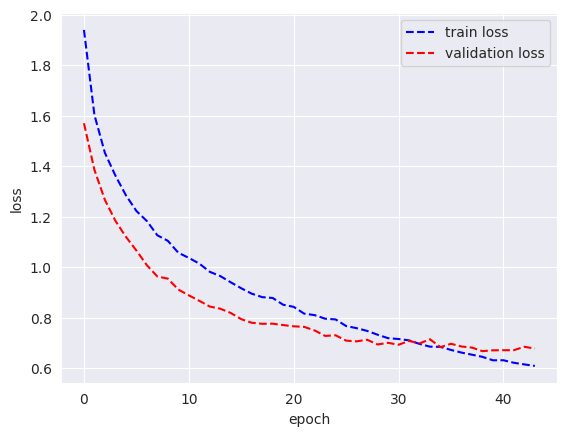

In [51]:
# 각 스텝의 학습 손실과 검증 손실을 그래프로 나타냅니다.

plt.plot(history.history['loss'], 'b--')
plt.plot(history.history['val_loss'], 'r--')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train loss', 'validation loss'])
plt.show()

In [52]:
# 모델을 평가합니다.

cnn_model.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7557 - loss: 0.7140


[0.7207095623016357, 0.7555999755859375]

In [53]:
# 예측 레이블 배열을 생성합니다.

predicted_labels = cnn_model.predict(test_images)
predicted_labels.shape

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


(10000, 10)

In [54]:
# 각 배열의 최대 값의 색인을 뽑아내어 예측 레이블로 사용합니다.

import tensorflow as tf

predicted_labels = tf.argmax(predicted_labels, axis=1)
predicted_labels

<tf.Tensor: shape=(10000,), dtype=int64, numpy=array([3, 8, 8, ..., 5, 4, 7])>

In [55]:
label_to_name = {
    0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer',
    5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'
}

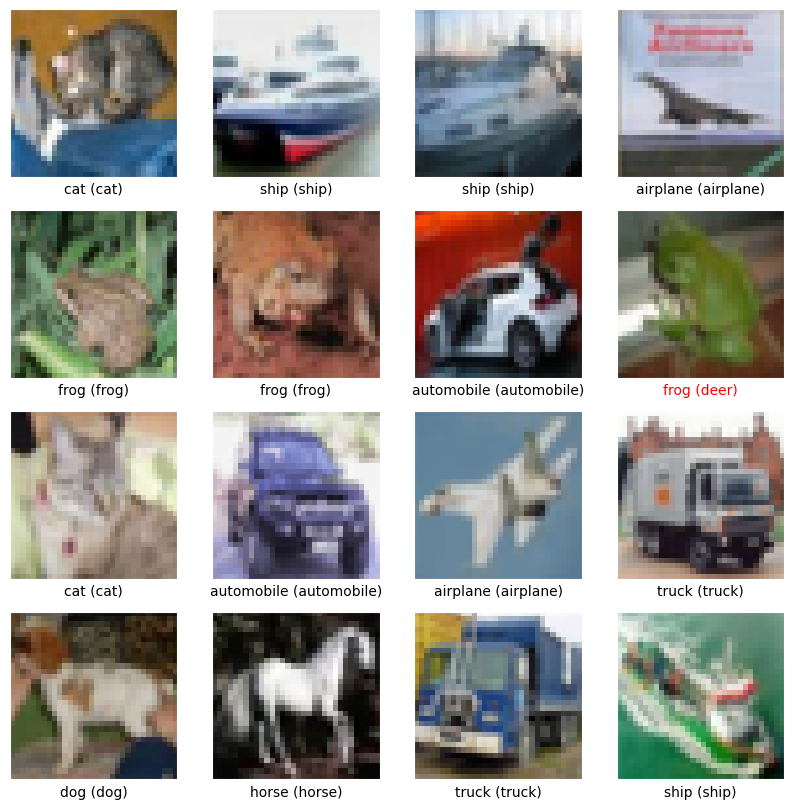

In [56]:
# test_images를 시각화하여 test_labels와 predicted_labels를 비교합니다.
# test_labels와 predicted_labels가 다를 때, xlabel의 색깔을 빨강색으로 변경합니다.

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    xlabel = f"{label_to_name[int(test_labels[i][0])]} ({label_to_name[int(predicted_labels[i])]})"
    plt.xlabel(xlabel, color='red' if test_labels[i][0] != predicted_labels[i] else 'black')

## 객체 인식

In [57]:
import cv2
import matplotlib.pyplot as plt

!wget https://raw.githubusercontent.com/Lilcob/test_colab/main/three%20young%20man.jpg

# 이미지 로드
image_path = "/content/three young man.jpg"
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 하르 캐스케이드 로드
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# 얼굴 탐지
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
print(faces)

--2025-03-25 09:22:39--  https://raw.githubusercontent.com/Lilcob/test_colab/main/three%20young%20man.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 146736 (143K) [image/jpeg]
Saving to: ‘three young man.jpg’

three young man.jpg 100%[===================>] 143.30K  --.-KB/s    in 0.02s   

2025-03-25 09:22:39 (6.54 MB/s) - ‘three young man.jpg’ saved [146736/146736]

[[449 111 173 173]
 [721 106 170 170]
 [159 148 160 160]
 [371 376 116 116]]


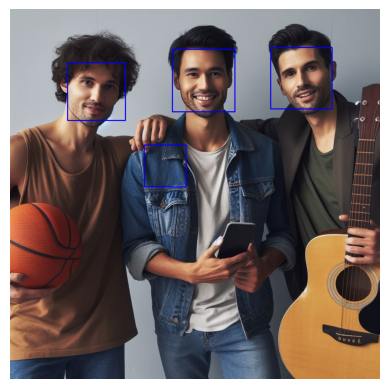

In [58]:
# 탐지된 얼굴에 사각형 그리기
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)

# 결과 표시
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # 축 정보 숨기기
plt.show()

## 스타일 전이
### Tensorflow를 활용한 VAE 모델 실습

In [59]:
from IPython import display

import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_probability as tfp
import time

In [60]:
# 데이터 세트 준비
(train_images, _), (_, _) = tf.keras.datasets.mnist.load_data()

def preprocess_images(images):
    images = images.reshape((images.shape[0], 28, 28, 1)) / 255.
    return np.where(images > .5, 1.0, 0.0).astype('float32')

train_images = preprocess_images(train_images)

train_shuffle = 60000
batch_size = 128

train_dataset = (tf.data.Dataset.from_tensor_slices(train_images)
                 .shuffle(train_shuffle).batch(batch_size))

In [61]:
# 모델 구현
class VAE(tf.keras.Model):
    """Variational Autoencoder."""

    def __init__(self, latent_dim):
        super(VAE, self).__init__()
        self.latent_dim = latent_dim
        self.encoder = tf.keras.Sequential(
            [
                tf.keras.layers.InputLayer(input_shape=(28, 28, 1)),
                tf.keras.layers.Flatten(),
                tf.keras.layers.Dense(512, activation='relu'),
                tf.keras.layers.Dense(512, activation='relu'),
                # No activation
                tf.keras.layers.Dense(latent_dim + latent_dim),
            ]
        )

        self.decoder = tf.keras.Sequential(
            [
                tf.keras.layers.InputLayer(input_shape=(latent_dim,)),
                tf.keras.layers.Dense(512, activation='relu'),
                tf.keras.layers.Dense(512, activation='relu'),
                # No activation
                tf.keras.layers.Dense(28*28*1),
                tf.keras.layers.Reshape(target_shape=(28, 28, 1)),
            ]
        )

    @tf.function
    def sample(self, eps=None):
        if eps is None:
            eps = tf.random.normal(shape=(100, self.latent_dim))
        return self.decode(eps, apply_sigmoid=True)

    def encode(self, x):
        mean, logvar = tf.split(self.encoder(x), num_or_size_splits=2, axis=1)
        return mean, logvar

    def reparameterize(self, mean, logvar):
        eps = tf.random.normal(shape=mean.shape)
        return eps * tf.exp(logvar * .5) + mean

    def decode(self, z, apply_sigmoid=False):
        logits = self.decoder(z)
        if apply_sigmoid:
            probs = tf.sigmoid(logits)
            return probs
        return logits

In [62]:
optimizer = tf.keras.optimizers.Adam(4e-4)


def log_normal_pdf(sample, mean, logvar, raxis=1):
    log2pi = tf.math.log(2. * np.pi)
    return tf.reduce_sum(
        -.5 * ((sample - mean) ** 2. * tf.exp(-logvar) + logvar + log2pi),
        axis=raxis)


def compute_loss(model, x):
    mean, logvar = model.encode(x)
    z = model.reparameterize(mean, logvar)
    x_logit = model.decode(z)
    cross_ent = tf.nn.sigmoid_cross_entropy_with_logits(logits=x_logit, labels=x)
    logpx_z = -tf.reduce_sum(cross_ent, axis=[1, 2, 3])
    logpz = log_normal_pdf(z, 0., 0.)
    logqz_x = log_normal_pdf(z, mean, logvar)
    return -tf.reduce_mean(logpx_z + logpz - logqz_x)

@tf.function
def train_step(model, x, optimizer):
    with tf.GradientTape() as tape:
        loss = compute_loss(model, x)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))


In [64]:
optimizer = tf.keras.optimizers.Adam(4e-4)


def log_normal_pdf(sample, mean, logvar, raxis=1):
    log2pi = tf.math.log(2. * np.pi)
    return tf.reduce_sum(
        -.5 * ((sample - mean) ** 2. * tf.exp(-logvar) + logvar + log2pi),
        axis=raxis)


def compute_loss(model, x):
    mean, logvar = model.encode(x)
    z = model.reparameterize(mean, logvar)
    x_logit = model.decode(z)
    cross_ent = tf.nn.sigmoid_cross_entropy_with_logits(logits=x_logit, labels=x)
    logpx_z = -tf.reduce_sum(cross_ent, axis=[1, 2, 3])
    logpz = log_normal_pdf(z, 0., 0.)
    logqz_x = log_normal_pdf(z, mean, logvar)
    return -tf.reduce_mean(logpx_z + logpz - logqz_x)

@tf.function
def train_step(model, x, optimizer):
    with tf.GradientTape() as tape:
        loss = compute_loss(model, x)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))


In [65]:
epochs = 50
# 2차원 잠재 백터를 준비합니다.
latent_dim = 2
num_examples_to_generate = 25

# 생성(예측)을 위해 랜덤 벡터를 일정하게 유지하여
# 개선 사항을 더 쉽게 볼 수 있습니다.
random_vector_for_generation = tf.random.normal(
    shape=[num_examples_to_generate, latent_dim])
model = VAE(latent_dim)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [66]:
# 학습 중간에 확인할 데이터를 정해줍니다.
assert batch_size >= num_examples_to_generate
for test_batch in train_dataset.take(1):
    test_sample = test_batch[0:num_examples_to_generate, :, :, :]

In [67]:
def generate_and_save_images(model, epoch, test_sample):
    mean, logvar = model.encode(test_sample)
    z = model.reparameterize(mean, logvar)
    predictions = model.sample(z)
    fig = plt.figure(figsize=(4, 4))

    for i in range(predictions.shape[0]):
        plt.subplot(5, 5, i + 1)
        plt.imshow(predictions[i, :, :, 0], cmap='gray')
        plt.axis('off')

    plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
    plt.show()

Epoch: 50, ELBO: -130.95091247558594, time elapse for current epoch: 1.7564337253570557


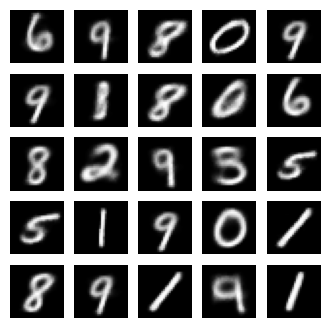

In [68]:
generate_and_save_images(model, 0, test_sample)

for epoch in range(1, epochs + 1):
    start_time = time.time()
    for train_x in train_dataset:
        train_step(model, train_x, optimizer)
    end_time = time.time()

    loss = tf.keras.metrics.Mean()
    for test_x in train_dataset:
        loss(compute_loss(model, test_x))
    elbo = -loss.result()
    display.clear_output(wait=False)
    print('Epoch: {}, ELBO: {}, time elapse for current epoch: {}'
          .format(epoch, elbo, end_time - start_time))
    generate_and_save_images(model, epoch, test_sample)

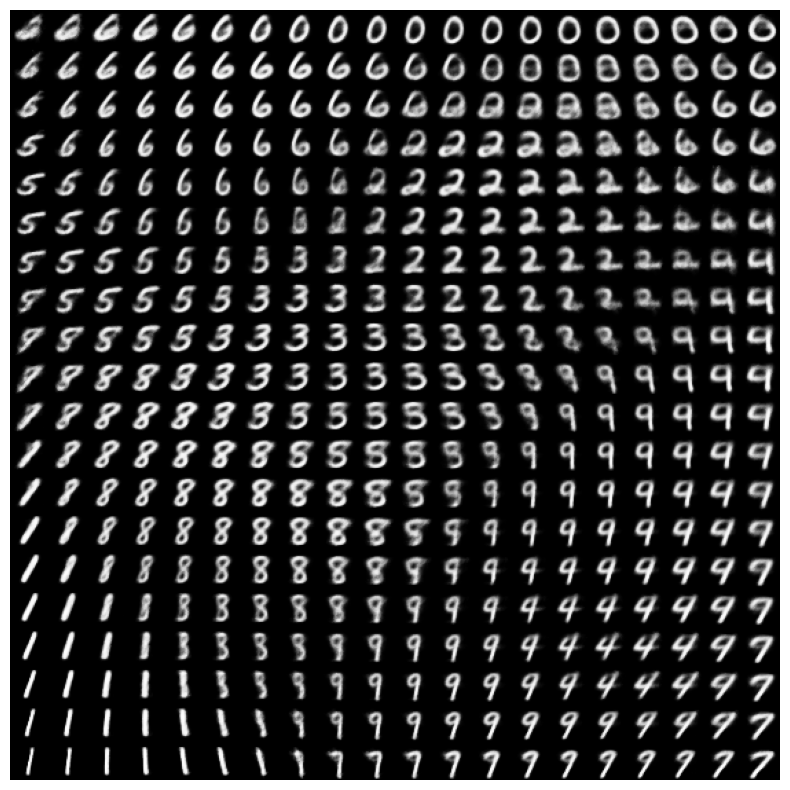

In [69]:
# 2차원 잠재 공간의 벡터로부터 숫자가 어떻게 생성되는지 확인하기
def plot_latent_images(model, n, digit_size=28):
    """Plots n x n digit images decoded from the latent space."""

    norm = tfp.distributions.Normal(0, 1)
    grid_x = norm.quantile(np.linspace(0.05, 0.95, n))
    grid_y = norm.quantile(np.linspace(0.05, 0.95, n))
    image_width = digit_size*n
    image_height = image_width
    image = np.zeros((image_height, image_width))

    for i, yi in enumerate(grid_x):
        for j, xi in enumerate(grid_y):
            z = np.array([[xi, yi]])
            x_decoded = model.sample(z)
            digit = tf.reshape(x_decoded[0], (digit_size, digit_size))
            image[i * digit_size: (i + 1) * digit_size,
                  j * digit_size: (j + 1) * digit_size] = digit.numpy()

    plt.figure(figsize=(10, 10))
    plt.imshow(image, cmap='Greys_r')
    plt.axis('Off')
    plt.show()

plot_latent_images(model, 20)